In [33]:
X = data.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
X_features = X[['TotalValue', 'Quantity']].values

In [34]:
kmeans = KMeans(n_clusters=4, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_features)

In [35]:
db_index = davies_bouldin_score(X_features, X['Cluster'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.5495184341182846


In [36]:
data = data.merge(X[['CustomerID', 'Cluster']], on='CustomerID', how='left')

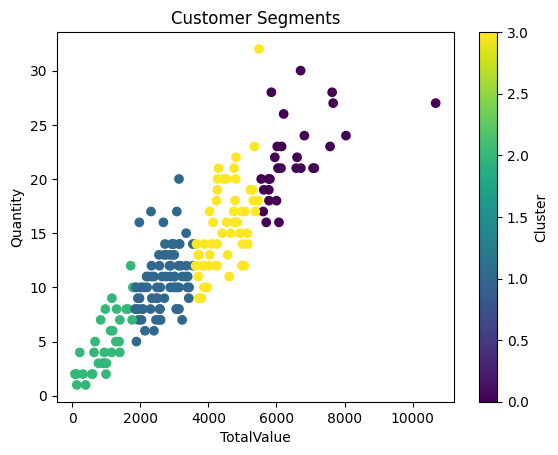

In [37]:
plt.scatter(X_features[:, 0], X_features[:, 1], c=X['Cluster'], cmap='viridis')
plt.xlabel('TotalValue')
plt.ylabel('Quantity')
plt.title('Customer Segments')
plt.colorbar(label='Cluster')
plt.show()
